# 데이터 및 라이브러리 임포트

In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/drive/MyDrive/DSL/EDA2023-1/kospi_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data['Close_lag'] = data['Close'].shift(1) #이 칼럼을 뒤로 한칸씩 민다
data['Log_Rate'] = np.log(data['Close']/data['Close_lag'])
data['Month'] = [x.month for x in data['Date']]
data['Day'] = [x.day for x in data['Date']]
data['Year'] = [x.year for x in data['Date']]
data

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098,NaN,NaN,5,1,1981
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,123.60,-0.000809,5,2,1981
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,123.50,-0.023762,5,4,1981
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,120.60,0.000829,5,6,1981
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,120.70,-0.011667,5,7,1981
...,...,...,...,...,...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,2447.45,0.012106,8,25,2022
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,2477.26,0.001521,8,26,2022
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,2481.03,-0.022063,8,29,2022
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,2426.89,0.009857,8,30,2022


In [4]:
data_temp = pd.DataFrame(data.groupby('Year')['Log_Rate'].sum()).reset_index()
data_temp.columns = ['Year', 'Year_Rate']
data1 = pd.merge(data, data_temp, on = 'Year', how = 'left')
data1

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Year_Rate
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098,NaN,NaN,5,1,1981,0.060434
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,123.60,-0.000809,5,2,1981,0.060434
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,123.50,-0.023762,5,4,1981,0.060434
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,120.60,0.000829,5,6,1981,0.060434
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,120.70,-0.011667,5,7,1981,0.060434
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,2447.45,0.012106,8,25,2022,-0.186087
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,2477.26,0.001521,8,26,2022,-0.186087
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,2481.03,-0.022063,8,29,2022,-0.186087
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,2426.89,0.009857,8,30,2022,-0.186087


#첫 6개월의 수익률이 플러스일 때 서머랠리가 더 잘 나타날까

In [5]:
data

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098,NaN,NaN,5,1,1981
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,123.60,-0.000809,5,2,1981
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,123.50,-0.023762,5,4,1981
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,120.60,0.000829,5,6,1981
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,120.70,-0.011667,5,7,1981
...,...,...,...,...,...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,2447.45,0.012106,8,25,2022
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,2477.26,0.001521,8,26,2022
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,2481.03,-0.022063,8,29,2022
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,2426.89,0.009857,8,30,2022


In [6]:
data['Half'] = data['Month'] <= 6

In [7]:
data_temp = pd.DataFrame(data.groupby(['Year', 'Half'])['Log_Rate'].sum()).reset_index()
data_temp.columns = ['Year', 'Half', 'Half_Rate']
data1 = pd.merge(data, data_temp, on = ['Year', 'Half'], how = 'left')
data1

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Half,Half_Rate
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098,NaN,NaN,5,1,1981,True,0.198904
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,123.60,-0.000809,5,2,1981,True,0.198904
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,123.50,-0.023762,5,4,1981,True,0.198904
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,120.60,0.000829,5,6,1981,True,0.198904
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,120.70,-0.011667,5,7,1981,True,0.198904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,2447.45,0.012106,8,25,2022,False,0.058047
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,2477.26,0.001521,8,26,2022,False,0.058047
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,2481.03,-0.022063,8,29,2022,False,0.058047
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,2426.89,0.009857,8,30,2022,False,0.058047


In [8]:
data1_up = data1[data1['Half_Rate'] >= 0]
data1_down = data1[data1['Half_Rate'] <= 0]

In [9]:
df_up = pd.DataFrame(data1_up.groupby('Month')['Log_Rate'].sum()).reset_index()
df_down = pd.DataFrame(data1_down.groupby('Month')['Log_Rate'].sum()).reset_index()

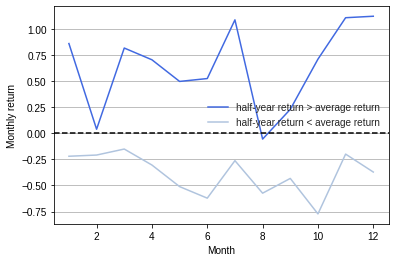

In [10]:
plt.plot(df_up['Month'], df_up['Log_Rate'], label = 'half-year return > average return', color = 'royalblue')
plt.plot(df_down['Month'], df_down['Log_Rate'], label = 'half-year return < average return', color = 'lightsteelblue')
plt.ylabel('Monthly return')
plt.xlabel('Month')
plt.grid(visible=True, axis = 'y')
plt.axhline(0, color = 'black', linestyle = '--')
plt.style.use('seaborn')
plt.legend()
plt.show()

##7월 첫날 주가 100으로 인덱스, 상반기 수익 플러스

In [11]:
first_days = list(data1_up[data1_up['Month']==7].groupby('Year')['Date'].min())
first_days

[Timestamp('1982-07-01 00:00:00'),
 Timestamp('1984-07-02 00:00:00'),
 Timestamp('1985-07-01 00:00:00'),
 Timestamp('1986-07-01 00:00:00'),
 Timestamp('1987-07-01 00:00:00'),
 Timestamp('1988-07-01 00:00:00'),
 Timestamp('1989-07-01 00:00:00'),
 Timestamp('1991-07-01 00:00:00'),
 Timestamp('1992-07-01 00:00:00'),
 Timestamp('1993-07-01 00:00:00'),
 Timestamp('1994-07-01 00:00:00'),
 Timestamp('1998-07-01 00:00:00'),
 Timestamp('1999-07-01 00:00:00'),
 Timestamp('2001-07-02 00:00:00'),
 Timestamp('2003-07-01 00:00:00'),
 Timestamp('2004-07-01 00:00:00'),
 Timestamp('2005-07-01 00:00:00'),
 Timestamp('2006-07-03 00:00:00'),
 Timestamp('2007-07-02 00:00:00'),
 Timestamp('2009-07-01 00:00:00'),
 Timestamp('2010-07-01 00:00:00'),
 Timestamp('2012-07-02 00:00:00'),
 Timestamp('2013-07-01 00:00:00'),
 Timestamp('2016-07-01 00:00:00'),
 Timestamp('2017-07-03 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2020-07-01 00:00:00'),
 Timestamp('2022-07-01 00:00:00')]

In [12]:
df_up = data1_up[(data1_up['Month'] == 7) | (data1_up['Date'].isin(first_days) == True)]
df_up

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Half,Half_Rate
343,1982-07-01,121.25,121.25,121.25,121.25,1640000.0,-0.0193,123.64,-0.019520,7,1,1982,False,0.042361
344,1982-07-02,124.30,124.30,124.30,124.30,2090000.0,0.0252,121.25,0.024843,7,2,1982,False,0.042361
345,1982-07-03,123.43,123.43,123.43,123.43,1660000.0,-0.0070,124.30,-0.007024,7,3,1982,False,0.042361
346,1982-07-05,119.72,119.72,119.72,119.72,1980000.0,-0.0301,123.43,-0.030519,7,5,1982,False,0.042361
347,1982-07-06,116.51,116.51,116.51,116.51,1390000.0,-0.0268,119.72,-0.027179,7,6,1982,False,0.042361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10997,2022-07-25,2403.69,2385.65,2412.47,2385.65,323090000.0,0.0044,2393.14,0.004399,7,25,2022,False,0.058047
10998,2022-07-26,2412.96,2397.27,2415.39,2395.17,415670000.0,0.0039,2403.69,0.003849,7,26,2022,False,0.058047
10999,2022-07-27,2415.53,2412.52,2415.53,2396.19,333590000.0,0.0011,2412.96,0.001065,7,27,2022,False,0.058047
11000,2022-07-28,2435.27,2437.57,2443.43,2429.07,491070000.0,0.0082,2415.53,0.008139,7,28,2022,False,0.058047


In [13]:
temp = []
for i, x in enumerate(df_up['Date']):
  if x in first_days:
    temp.append(100)
  else:
    temp.append(temp[i-1]*(1+float(data[data['Date']==x]['Log_Rate'])))

print(temp)
print(len(temp))
df_up['July'] = temp
df_up

[100, 102.48434686990728, 101.76451682645207, 98.65881532354386, 95.97740913894755, 98.14399730583415, 97.79748989421061, 97.75630333226509, 98.03591270210427, 98.45502826963263, 98.68535177608945, 99.22739984469591, 99.33440132310669, 100.30144628071146, 100.1118638382358, 99.11044718627072, 98.6068654707974, 99.59822696144091, 100.10742985763697, 100.70670528535335, 100.70670528535335, 100.73963480589046, 101.853243669491, 101.86970879136155, 102.77136160131724, 102.97697841513647, 100, 100.28360115585888, 101.45875343880981, 99.93535494508664, 101.70012925292946, 103.12498298992406, 102.32394839764896, 101.77005453444677, 101.3472132840882, 100.73930516709324, 101.74693562457166, 101.78528583256575, 100.72107661955783, 101.18029205007645, 101.83785539495072, 102.28179413727375, 102.69517819548382, 103.73312878471283, 103.57192730893921, 103.52589534048862, 103.87812875614227, 103.77068978360768, 103.40956081081056, 103.50156220550075, 103.19429891852013, 100, 100.03653501922192, 99.

<ipython-input-13-fcf15059df5e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_up['July'] = temp


,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Half,Half_Rate,July
343,1982-07-01,121.25,121.25,121.25,121.25,1640000.0,-0.0193,123.64,-0.019520,7,1,1982,False,0.042361,100.000000
344,1982-07-02,124.30,124.30,124.30,124.30,2090000.0,0.0252,121.25,0.024843,7,2,1982,False,0.042361,102.484347
345,1982-07-03,123.43,123.43,123.43,123.43,1660000.0,-0.0070,124.30,-0.007024,7,3,1982,False,0.042361,101.764517
346,1982-07-05,119.72,119.72,119.72,119.72,1980000.0,-0.0301,123.43,-0.030519,7,5,1982,False,0.042361,98.658815
347,1982-07-06,116.51,116.51,116.51,116.51,1390000.0,-0.0268,119.72,-0.027179,7,6,1982,False,0.042361,95.977409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10997,2022-07-25,2403.69,2385.65,2412.47,2385.65,323090000.0,0.0044,2393.14,0.004399,7,25,2022,False,0.058047,104.165126
10998,2022-07-26,2412.96,2397.27,2415.39,2395.17,415670000.0,0.0039,2403.69,0.003849,7,26,2022,False,0.058047,104.566073
10999,2022-07-27,2415.53,2412.52,2415.53,2396.19,333590000.0,0.0011,2412.96,0.001065,7,27,2022,False,0.058047,104.677385
11000,2022-07-28,2435.27,2437.57,2443.43,2429.07,491070000.0,0.0082,2415.53,0.008139,7,28,2022,False,0.058047,105.529345


In [14]:
temp = []
for i in df_up['Year'].unique():
  # print(i)
  for j in np.arange(len(df_up[df_up['Year']==i])):
    temp.append(j)
df_up['July_num'] = temp
df_up

<ipython-input-14-54cb57226797>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_up['July_num'] = temp


,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Half,Half_Rate,July,July_num
343,1982-07-01,121.25,121.25,121.25,121.25,1640000.0,-0.0193,123.64,-0.019520,7,1,1982,False,0.042361,100.000000,0
344,1982-07-02,124.30,124.30,124.30,124.30,2090000.0,0.0252,121.25,0.024843,7,2,1982,False,0.042361,102.484347,1
345,1982-07-03,123.43,123.43,123.43,123.43,1660000.0,-0.0070,124.30,-0.007024,7,3,1982,False,0.042361,101.764517,2
346,1982-07-05,119.72,119.72,119.72,119.72,1980000.0,-0.0301,123.43,-0.030519,7,5,1982,False,0.042361,98.658815,3
347,1982-07-06,116.51,116.51,116.51,116.51,1390000.0,-0.0268,119.72,-0.027179,7,6,1982,False,0.042361,95.977409,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10997,2022-07-25,2403.69,2385.65,2412.47,2385.65,323090000.0,0.0044,2393.14,0.004399,7,25,2022,False,0.058047,104.165126,16
10998,2022-07-26,2412.96,2397.27,2415.39,2395.17,415670000.0,0.0039,2403.69,0.003849,7,26,2022,False,0.058047,104.566073,17
10999,2022-07-27,2415.53,2412.52,2415.53,2396.19,333590000.0,0.0011,2412.96,0.001065,7,27,2022,False,0.058047,104.677385,18
11000,2022-07-28,2435.27,2437.57,2443.43,2429.07,491070000.0,0.0082,2415.53,0.008139,7,28,2022,False,0.058047,105.529345,19


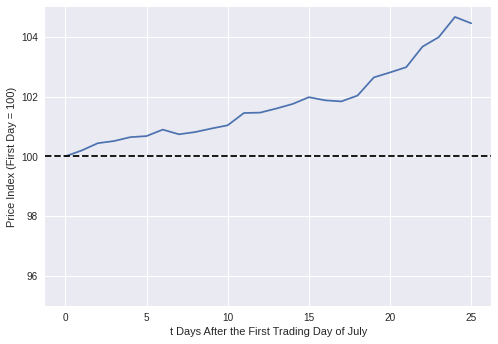

In [15]:
df1 = pd.DataFrame(df_up.groupby('July_num')['July'].mean()).reset_index()
plt.plot(df1['July_num'], df1['July'])
plt.xlabel('t Days After the First Trading Day of July')
plt.ylabel('Price Index (First Day = 100)')
plt.ylim(95, 105)
plt.grid(visible=True, axis = 'y')
plt.axhline(100, color = 'black', linestyle = '--')
plt.style.use('seaborn')
plt.show()

##7월 첫날 주가 100으로 인덱스, 상반기 수익 마이너스

In [16]:
first_days = list(data1_down[data1_down['Month']==7].groupby('Year')['Date'].min())
first_days

[Timestamp('1981-07-01 00:00:00'),
 Timestamp('1983-07-01 00:00:00'),
 Timestamp('1990-07-02 00:00:00'),
 Timestamp('1995-07-01 00:00:00'),
 Timestamp('1996-07-01 00:00:00'),
 Timestamp('1997-07-01 00:00:00'),
 Timestamp('2000-07-03 00:00:00'),
 Timestamp('2002-07-02 00:00:00'),
 Timestamp('2008-07-01 00:00:00'),
 Timestamp('2011-07-01 00:00:00'),
 Timestamp('2014-07-01 00:00:00'),
 Timestamp('2015-07-01 00:00:00'),
 Timestamp('2018-07-02 00:00:00'),
 Timestamp('2021-07-01 00:00:00')]

In [17]:
df_down = data1_down[(data1_down['Month'] == 7) | (data1_down['Date'].isin(first_days) == True)]
df_down

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Half,Half_Rate
49,1981-07-01,156.40,156.40,156.40,156.40,3010000.0,0.0371,150.80,0.036462,7,1,1981,False,-0.138470
50,1981-07-02,155.00,155.00,155.00,155.00,2580000.0,-0.0090,156.40,-0.008992,7,2,1981,False,-0.138470
51,1981-07-03,155.70,155.70,155.70,155.70,2230000.0,0.0045,155.00,0.004506,7,3,1981,False,-0.138470
52,1981-07-04,157.80,157.80,157.80,157.80,1860000.0,0.0135,155.70,0.013397,7,4,1981,False,-0.138470
53,1981-07-06,160.90,160.90,160.90,160.90,2620000.0,0.0196,157.80,0.019455,7,6,1981,False,-0.138470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10752,2021-07-26,3224.95,3265.99,3265.99,3224.95,826070000.0,-0.0091,3254.42,-0.009097,7,26,2021,False,-0.101782
10753,2021-07-27,3232.53,3244.43,3252.85,3230.75,991940000.0,0.0024,3224.95,0.002348,7,27,2021,False,-0.101782
10754,2021-07-28,3236.86,3226.06,3243.21,3210.90,868600000.0,0.0013,3232.53,0.001339,7,28,2021,False,-0.101782
10755,2021-07-29,3242.65,3248.49,3252.26,3232.50,694820000.0,0.0018,3236.86,0.001787,7,29,2021,False,-0.101782


In [18]:
temp = []
for i, x in enumerate(df_down['Date']):
  if x in first_days:
    temp.append(100)
  else:
    temp.append(temp[i-1]*(1+float(data[data['Date']==x]['Change'])))

print(temp)
print(len(temp))
df_down['July'] = temp
df_down

[100, 99.1, 99.54594999999999, 100.889820325, 102.86726080337, 106.0664326143548, 104.2739099031722, 104.72228771575584, 102.22989726812085, 102.48547201129115, 101.20440361115001, 99.60537403409384, 99.09738662651996, 99.67215146895379, 101.46625019539495, 99.22384606607673, 99.41237137360228, 97.8814208544488, 95.90421615318894, 94.49442417573705, 95.514963956835, 93.91986405875585, 92.323226369757, 93.02488289016715, 94.29932378576244, 94.68595101328407, 100, 99.67, 99.101881, 99.46855795970001, 99.72717621039521, 99.78701251612145, 99.72714030861178, 100.01634901550675, 99.72630160336178, 98.9883269714969, 98.81014798294821, 99.27455567846806, 99.37383023414652, 99.51295359647433, 100.71706033499167, 100.87820763152766, 100.38390441413317, 101.0163230119422, 101.13754259955654, 101.33981768475566, 101.24861184883937, 101.18786268173007, 101.07655603278016, 101.59204646854735, 102.0288922683621, 102.07990671449627, 100, 104.47, 103.101443, 101.3899590462, 100.41661543935648, 100.024

<ipython-input-18-406e7b396ad6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_down['July'] = temp


,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Half,Half_Rate,July
49,1981-07-01,156.40,156.40,156.40,156.40,3010000.0,0.0371,150.80,0.036462,7,1,1981,False,-0.138470,100.000000
50,1981-07-02,155.00,155.00,155.00,155.00,2580000.0,-0.0090,156.40,-0.008992,7,2,1981,False,-0.138470,99.100000
51,1981-07-03,155.70,155.70,155.70,155.70,2230000.0,0.0045,155.00,0.004506,7,3,1981,False,-0.138470,99.545950
52,1981-07-04,157.80,157.80,157.80,157.80,1860000.0,0.0135,155.70,0.013397,7,4,1981,False,-0.138470,100.889820
53,1981-07-06,160.90,160.90,160.90,160.90,2620000.0,0.0196,157.80,0.019455,7,6,1981,False,-0.138470,102.867261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10752,2021-07-26,3224.95,3265.99,3265.99,3224.95,826070000.0,-0.0091,3254.42,-0.009097,7,26,2021,False,-0.101782,98.274706
10753,2021-07-27,3232.53,3244.43,3252.85,3230.75,991940000.0,0.0024,3224.95,0.002348,7,27,2021,False,-0.101782,98.510565
10754,2021-07-28,3236.86,3226.06,3243.21,3210.90,868600000.0,0.0013,3232.53,0.001339,7,28,2021,False,-0.101782,98.638629
10755,2021-07-29,3242.65,3248.49,3252.26,3232.50,694820000.0,0.0018,3236.86,0.001787,7,29,2021,False,-0.101782,98.816179


In [19]:
temp = []
for i in df_down['Year'].unique():
  # print(i)
  for j in np.arange(len(df_down[df_down['Year']==i])):
    temp.append(j)
df_down['July_num'] = temp
df_down

<ipython-input-19-3470d03ad51e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_down['July_num'] = temp


,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Half,Half_Rate,July,July_num
49,1981-07-01,156.40,156.40,156.40,156.40,3010000.0,0.0371,150.80,0.036462,7,1,1981,False,-0.138470,100.000000,0
50,1981-07-02,155.00,155.00,155.00,155.00,2580000.0,-0.0090,156.40,-0.008992,7,2,1981,False,-0.138470,99.100000,1
51,1981-07-03,155.70,155.70,155.70,155.70,2230000.0,0.0045,155.00,0.004506,7,3,1981,False,-0.138470,99.545950,2
52,1981-07-04,157.80,157.80,157.80,157.80,1860000.0,0.0135,155.70,0.013397,7,4,1981,False,-0.138470,100.889820,3
53,1981-07-06,160.90,160.90,160.90,160.90,2620000.0,0.0196,157.80,0.019455,7,6,1981,False,-0.138470,102.867261,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10752,2021-07-26,3224.95,3265.99,3265.99,3224.95,826070000.0,-0.0091,3254.42,-0.009097,7,26,2021,False,-0.101782,98.274706,17
10753,2021-07-27,3232.53,3244.43,3252.85,3230.75,991940000.0,0.0024,3224.95,0.002348,7,27,2021,False,-0.101782,98.510565,18
10754,2021-07-28,3236.86,3226.06,3243.21,3210.90,868600000.0,0.0013,3232.53,0.001339,7,28,2021,False,-0.101782,98.638629,19
10755,2021-07-29,3242.65,3248.49,3252.26,3232.50,694820000.0,0.0018,3236.86,0.001787,7,29,2021,False,-0.101782,98.816179,20


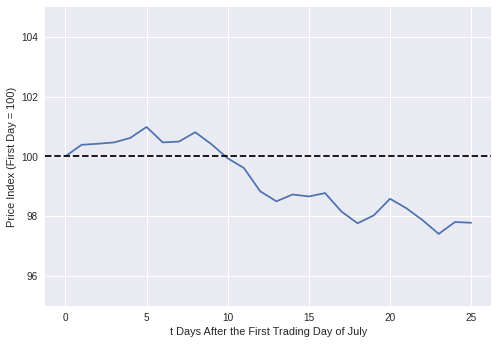

In [20]:
df2 = pd.DataFrame(df_down.groupby('July_num')['July'].mean()).reset_index()
plt.plot(df2['July_num'], df2['July'])
plt.xlabel('t Days After the First Trading Day of July')
plt.ylabel('Price Index (First Day = 100)')
plt.ylim(95, 105)
plt.grid(visible=True, axis = 'y')
plt.axhline(100, color = 'black', linestyle = '--')
plt.style.use('seaborn')
plt.show()

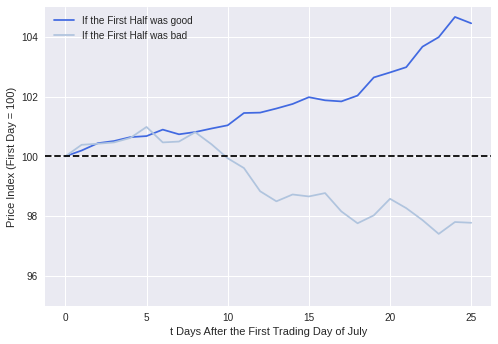

In [21]:
plt.plot(df1['July_num'], df1['July'],label = 'If the First Half was good', color = 'royalblue')
plt.plot(df2['July_num'], df2['July'], label = 'If the First Half was bad', color = 'lightsteelblue')
plt.xlabel('t Days After the First Trading Day of July')
plt.ylabel('Price Index (First Day = 100)')
plt.ylim(95, 105)
plt.grid(visible=True, axis = 'y')
plt.axhline(100, color = 'black', linestyle = '--')
plt.style.use('seaborn')
plt.legend()
plt.show()

In [27]:
len(data['Year'].unique())

42

In [28]:
len(df_up['Year'].unique())

28

In [29]:
len(df_down['Year'].unique())

14